# 疫学的因果関係
統計学が物的証拠として使われる代表例としては法律の決定や他何らかのトラブルに対する因果関係を証明するために疫学的因果関係を推定する。ここで、疫学的因果関係は7つの構成要素があるが、一般的には疫学四原則の「時間的関連性」「量的相関性」「質的相関性」「原因と結果の関連性」になる。本項では疫学四原則の文面をそのままプログラムとして実装するため「原因と結果の関連性」以外を実装する。

また、疫学における因果関係はその専門分野の知識を多く持っていなくても使用できるメリットがあるため、研究活動において最初の頃には役に立ちやすい。

ここでは労働経験の有無を原因として結果を犯罪の有無の因果関係を考察する。

# ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの確認

In [2]:
df = pd.read_csv("rossi.csv")
df.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


## 時間的関連性
労働経験がない人が犯罪をしたのか、犯罪をした人が労働をしていなかったのかの順序関係をベイズ推定で算出する。

In [3]:
x_col = "wexp"
y_col = "arrest"
x_val = list(set(df[x_col].values.tolist()))
for x_v in x_val:
    dfx = df.query("%s==%d"%(x_col, x_v))
    y_val = list(set(dfx[y_col].values.tolist()))
    for y_v in y_val:
        dfxy = dfx.query("%s==%d"%(y_col, y_v))
        print("p(%s=%d  | %s=%d)=%.3f"%(y_col, y_v, x_col, x_v, len(dfxy)/len(dfx)))
y_val = list(set(df[y_col].values.tolist()))
for y_v in y_val:
    dfy = df.query("%s==%d"%(y_col, y_v))
    x_val = list(set(dfy[x_col].values.tolist()))
    for x_v in x_val:
        dfyx = dfy.query("%s==%d"%(x_col, x_v))
        print("p(%s=%d  | %s=%d)=%.3f"%(x_col, x_v, y_col, y_v, len(dfyx)/len(dfy)))

p(arrest=0  | wexp=0)=0.665
p(arrest=1  | wexp=0)=0.335
p(arrest=0  | wexp=1)=0.789
p(arrest=1  | wexp=1)=0.211
p(wexp=0  | arrest=0)=0.387
p(wexp=1  | arrest=0)=0.613
p(wexp=0  | arrest=1)=0.544
p(wexp=1  | arrest=1)=0.456


### 結果の解釈
労働をしたことがない人が犯罪をした割合は33.5%であったのに対して逮捕された人の中で犯罪をした人は54.4%だったため原因が逮捕で結果が労働をしていなかったと解釈できる。また、労働経験があって犯罪をした割合は21.1%に対して逮捕された人の中で労働をしていた割合は45.6%となるため、労働経験と犯罪の順序関係だけでなく職業経験そのものに大きな差は見られないことが分かる。

## 量的相関性
過去に犯罪をした回数と労働経験の有無で相関係数を算出する。ただし、比較のために全部の要因と水準でも同様に相関係数を算出する。

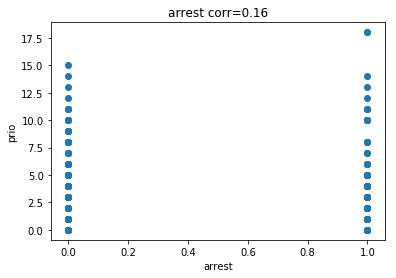

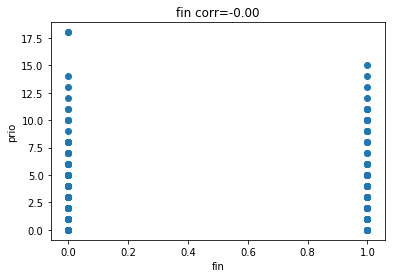

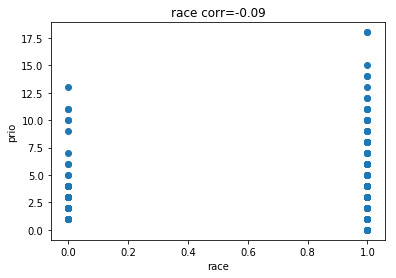

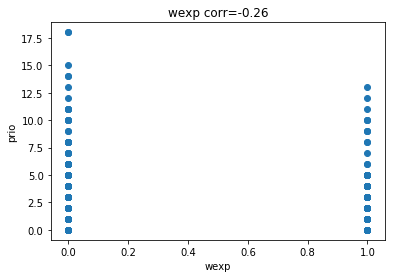

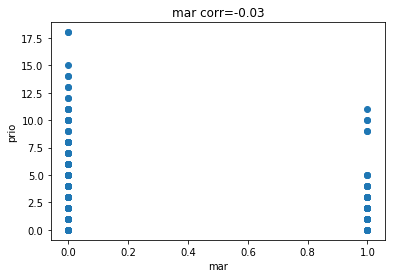

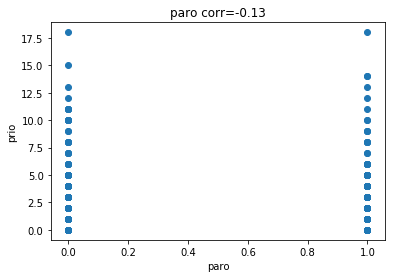

In [4]:
dfq = df.drop(["age", "week", "prio"], axis=1)
dfq = dfq.query("arrest==1")
columns = dfq.columns
corarray = []
for col in columns:
    trg = df[col].values
    prio = df["prio"].values
    corr = np.corrcoef(trg, prio)[0][1]
    plt.scatter(trg, prio)
    plt.xlabel(col)
    plt.ylabel("prio")
    plt.title("%s corr=%.2f"%(col, corr))
    plt.show()
    corarray.append([col, corr])

In [5]:
dfc = pd.DataFrame(corarray)
dfc.columns = ["項目", "相関係数"]
dfc

,項目,相関係数
0,arrest,0.163130
1,fin,-0.000800
2,race,-0.089904
3,wexp,-0.260363
4,mar,-0.029614
5,paro,-0.126282


### 結果の解釈
労働経験と犯罪の回数は他の項目と比較して高い数値になるが、相関係数の絶対値が0.8を上回らないため相関としては強くない。

## 質的相関性
質的変数と逮捕について相関係数を算出する。

In [6]:
dfq = df.drop(["age", "week", "prio"], axis=1)
dfq_corr = dfq.corr()
dfq_corr

,arrest,fin,race,wexp,mar,paro
arrest,1.000000,-0.094538,0.031795,-0.139900,-0.095831,-0.026574
fin,-0.094538,1.000000,0.063502,0.004678,-0.035279,-0.014293
race,0.031795,0.063502,1.000000,-0.038453,-0.053716,0.040037
wexp,-0.139900,0.004678,-0.038453,1.000000,0.252340,0.051418
mar,-0.095831,-0.035279,-0.053716,0.252340,1.000000,0.090662
paro,-0.026574,-0.014293,0.040037,0.051418,0.090662,1.000000


### 結果の解釈
逮捕の有無と相関が最も強い項目は労働経験の有無ではあるが、相関係数の絶対値が0.8を超えないため強い相関があるとは言えない。